<h1><center>Praktikum Pemrosesan Data</center></h1>
<h1><center>Web Scrapping Data E-commerce</center></h1>
<h2><center>Dosen Pengampu Edi Satriyanto S.Si., M.Si</center></h2>

#

#

#

<img src="logo pens.png" 
        alt="Picture" 
        width="380" 
        height="380" 
        style="display: block; margin: 0 auto" />

#

#

#

#

<h4><center>Wahyu Ikbal Maulana</center></h4>

<h4><center>3323600056</center></h4>

<h4><center>D4 SDT B</center></h4>

<h2><center>Politeknik Elektronika Negeri Surabaya</center></h2>
  ‎ 


In [4]:
import time
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

# Menetapkan URL target untuk scraping data
url = 'https://www.tokopedia.com/search?q=hp+samsung&source=universe&st=product&navsource=home&srp_component_id=02.02.01.01'
driver = webdriver.Chrome()  # Membuka browser Chrome
driver.get(url)  # Mengakses URL yang ditargetkan

data_scrapping = []  # Inisialisasi list untuk menyimpan data yang discrap

# Melakukan iterasi sebanyak 3 kali untuk mengambil data dari 3 halaman
for i in range(3):
    WebDriverWait(driver, 5).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#zeus-root")))
    time.sleep(2)  # Memberikan jeda untuk memastikan semua elemen telah dimuat
    for j in range(23):  # Scroll halaman secara bertahap untuk memuat semua produk
        driver.execute_script("window.scrollBy(0, 250)")
        time.sleep(1)

    driver.execute_script("window.scrollBy(50, 0)")  # Scroll horizontal jika diperlukan
    time.sleep(1)

    soup = BeautifulSoup(driver.page_source, 'html.parser')  # Parsing halaman dengan BeautifulSoup
    for item in soup.findAll('div', class_='css-1asz3by'):  # Mencari semua div yang mengandung informasi produk
        nama_produk = item.find('div', class_='prd_link-product-name css-3um8ox').text  # Mengambil nama produk
        harga_produk = item.find('div', class_='prd_link-product-price css-h66vau').text  # Mengambil harga produk

        rtg = item.findAll('span', class_='prd_rating-average-text css-t70v7i')  # Mencari rating produk
        if len(rtg) > 0:
            rating = item.find('span', class_='prd_rating-average-text css-t70v7i').text
        else:
            rating = ""
        
        tjl = item.findAll('span', class_='prd_label-integrity css-1sgek4h')  # Mencari informasi jumlah terjual
        if len(tjl) > 0:
            terjual = item.find('span', class_='prd_label-integrity css-1sgek4h').text
        else:
            terjual = ""
        
        for item2 in item.findAll('div', class_='css-1rn0irl'):  # Mencari informasi toko dan lokasi
            lokasi = item2.findAll('span', class_='css-1kdc32b')[0].text
            toko = item2.findAll('span', class_='css-1kdc32b')[1].text
            
            data_scrapping.append(
                (nama_produk, harga_produk, toko, lokasi, rating, terjual)
            )

    time.sleep(2))
    driver.find_element(By.CSS_SELECTOR, "button[aria-label^='Laman berikutnya']").click()  # Navigasi ke halaman berikutnya
    time.sleep(3)

# Membuat DataFrame dari data yang telah di-scrap
df = pd.DataFrame(data_scrapping, columns=["Nama Barang", "Harga Barang", "Toko", "Lokasi", "Rating", "Terjual"])
print(df)

# Menyimpan data ke dalam file Excel
df.to_excel('Data Scrapping Tokopedia.xlsx', index=False)
print("Data Tersimpan")

driver.close()  # Menutup browser


                                           Nama Barang  Harga Barang  \
0                        Samsung Galaxy M54 5G 8/256GB   Rp4.499.000   
1                Samsung Galaxy A15 LTE 8/128GB - Blue   Rp2.699.000   
2                        Samsung Galaxy A35 5G 8/256GB   Rp4.999.000   
3                        Samsung Galaxy M34 5G 8/128GB   Rp3.399.000   
4                        Samsung Galaxy A34 5G 8/256GB   Rp4.199.000   
..                                                 ...           ...   
270  Samsung Galaxy Tab A8 2018 with s pen (LTE & W...   Rp1.199.900   
271  SAMSUNG GALAXY NOTE 10 5G - 256GB / 12GB - BNI...   Rp5.990.000   
272  Samsung Z Fold 5 12/512GB Second Fullset Garan...  Rp18.500.000   
273  (RESMI) Samsung Galaxy S23 Ultra S23+ Plus S23...  Rp10.299.000   
274                    Samsung Galaxy M34 5G 8GB/128GB   Rp3.372.000   

                       Toko          Lokasi Rating       Terjual  
0    Samsung Official Store   Jakarta Utara    4.9  100+ terjual  
1

C:\Users\M S I\AppData\Local\Temp\ipykernel_20296\1432233906.py:57: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.2' currently installed).
  df.to_excel('Data Scrapping Tokopedia.xlsx', index=False)


Data Tersimpan


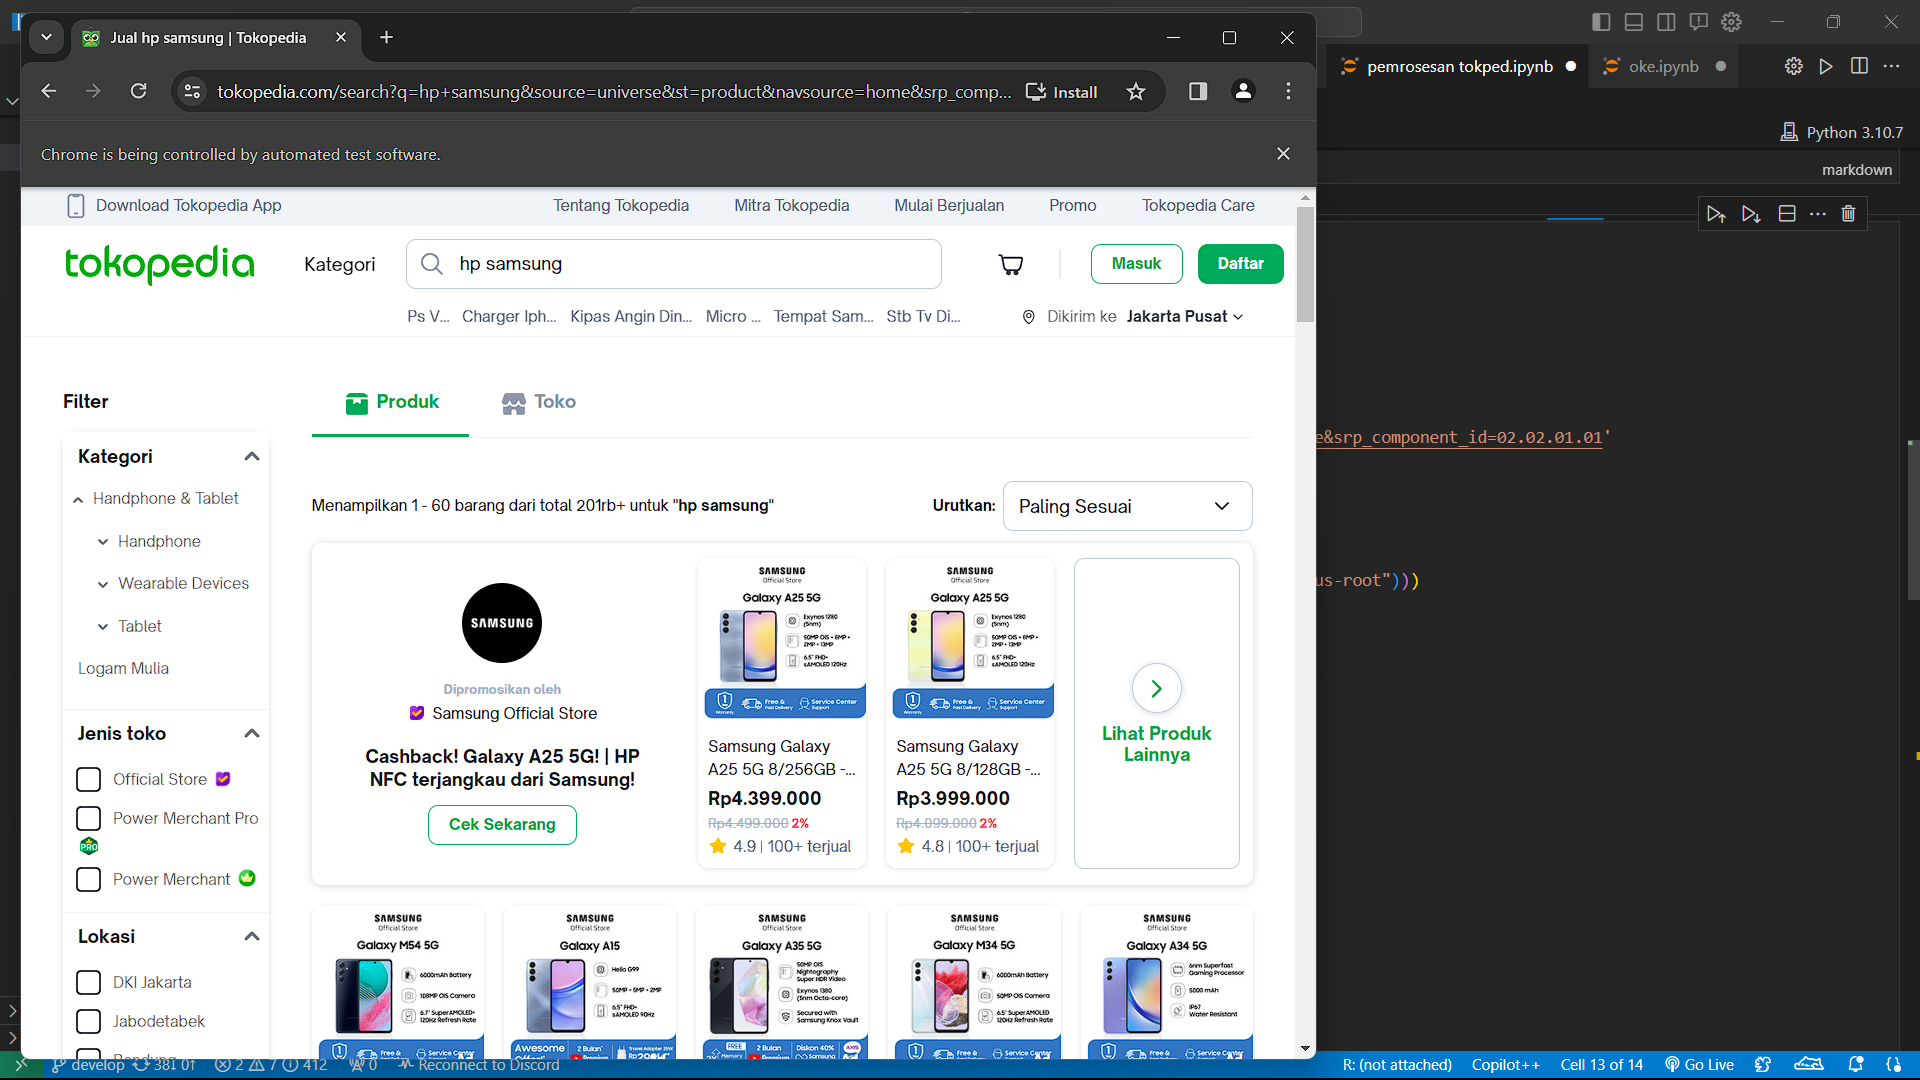

In [3]:
import pandas as pd

# Membuka file Excel yang telah disimpan
data = pd.read_excel('Data Scrapping Tokopedia.xlsx')
data

,Nama Barang,Harga Barang,Toko,Lokasi,Rating,Terjual
0,Samsung Galaxy M54 5G 8/256GB,Rp4.499.000,Samsung Official Store,Jakarta Utara,4.9,100+ terjual
1,Samsung Galaxy A15 LTE 8/128GB - Blue,Rp2.699.000,Samsung Official Store,Jakarta Utara,4.9,1rb+ terjual
2,Samsung Galaxy A35 5G 8/256GB,Rp4.999.000,Samsung Official Store,Jakarta Utara,5.0,500+ terjual
3,Samsung Galaxy M34 5G 8/128GB,Rp3.399.000,Samsung Official Store,Jakarta Utara,4.9,1rb+ terjual
4,Samsung Galaxy A34 5G 8/256GB,Rp4.199.000,Samsung Official Store,Jakarta Utara,4.9,500+ terjual
...,...,...,...,...,...,...
270,Samsung Galaxy Tab A8 2018 with s pen (LTE & WIFI) Resmi samsung sein,Rp1.199.900,Grandphone BSD,Kab. Tangerang,5.0,26 terjual
271,SAMSUNG GALAXY NOTE 10 5G - 256GB / 12GB - BNIB - ORIGINAL - Note10,Rp5.990.000,RosanShop,Jakarta Barat,4.8,30+ terjual
272,Samsung Z Fold 5 12/512GB Second Fullset Garansi Resmi Indonesia,Rp18.500.000,SuksesGadget,Jakarta Utara,5.0,3 terjual
273,(RESMI) Samsung Galaxy S23 Ultra S23+ Plus S23 1TB 512GB 256GB 128GB,Rp10.299.000,Putra Group,Jakarta Pusat,5.0,750+ terjual
